In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
ticker = 'AAPL' 
start_date = '2020-01-01'
end_date = '2024-01-01'

In [ ]:
data = yf.download(ticker, start=start_date, end=end_date)

/tmp/ipython-input-13-3223770355.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Tomorrow_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [ ]:
X = data[['Close']].values  
y = data['Tomorrow_Close'].values  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 4.4077


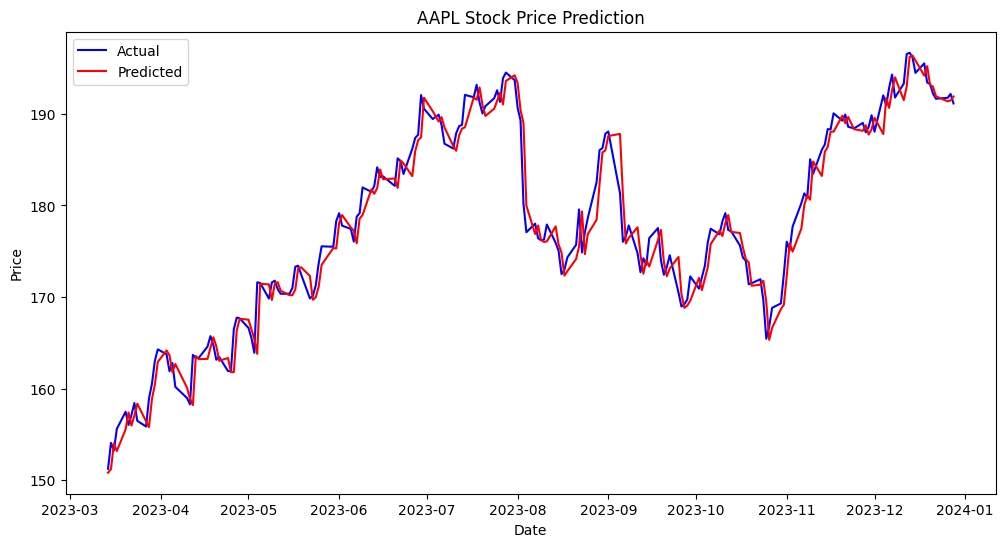

In [ ]:
try:
    y_pred = model.predict(X_test)
except NameError as e:
    print("Error during prediction:", e)
    y_pred = np.zeros_like(y_test)


if 'y_pred' in locals():
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

   
    plt.figure(figsize=(12,6))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='blue')
    plt.plot(data.index[-len(y_test):], y_pred, label='Predicted', color='red')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print("Prediction failed. Please check the model and data.")
